<a href="https://colab.research.google.com/github/Dataniel31/Proyecto1-AnalisisDe-Pel-culasySeries-de-TVenIMDB/blob/main/Proyecto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SCI: Inteligencia Artificial - Proyecto 1
## Análisis de Películas y Series de TV en IMDb

En este proyecto, exploraremos datos de películas y series de televisión utilizando la base de datos de IMDb. Utilizaremos Jupyter Notebook para realizar análisis y visualizaciones. A continuación, se presentan los pasos principales:

1. **Carga y limpieza de datos**: Utilizaremos la librería pandas para cargar el dataset y realizar la limpieza básica de datos (manejo de valores nulos, tipo de datos).

2. **Análisis exploratorio (EDA)**: Exploraremos tendencias, distribuciones y relaciones entre variables. Algunas preguntas interesantes podrían ser:
   - ¿Qué directores tienden a generar mayores ingresos en taquilla?
   - ¿Qué actores están asociados con películas que generan mayores ingresos?
   - ¿Qué directores tienden a recibir más votos en IMDb?
   - ¿Qué actores están asociados con películas que reciben más votos?
   - ¿Qué géneros de películas son los preferidos por los actores?
   - ¿Qué combinación de actores (Star1, Star2, Star3 y Star4) está obteniendo buenas calificaciones en IMDb la mayor parte del tiempo?
   - ¿Qué combinación de actores (Star1, Star2, Star3 y Star4) está obteniendo buenos ingresos en taquilla?

3. **Visualización de datos**: Utilizaremos gráficos y visualizaciones utilizando la librería matplotlib.

In [838]:
#Importa librerias necesarias para la solucion
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



1.1 **Carga de datos**: Utilizaremos la librería pandas para cargar el dataset desde el archivo CSV descargado. Con el siguiente código:

In [839]:
#crear el dataframe.
df=pd.read_csv('imdb_top_1000.csv')

# vemos cuantas filas y columnas posee el dataframe.
print(df.shape)

#imprimimos las 5 primeras filas para observar los datos.
df.head()



(1000, 16)


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [840]:
#Eliminamos las columnas que no necesitamos
ColumnasA_eliminar= ['Poster_Link']
df = df.drop(columns=ColumnasA_eliminar)
df.columns = [
    'Titulo', 'Año de lanzamiento', 'Certificacion', 
    'Duracion', 'Genero', 'Calificacion en IMDB', 'Resumen', 
    'Puntuacion en Metacritic', 'Director', 'Actor Principal 1', 
    'Actor Principal 2', 'Actor Principal 3', 'Actor Principal 4', 
    'Numero de votos', 'Recaudacion bruta'
]


df.head()




,Titulo,Año de lanzamiento,Certificacion,Duracion,Genero,Calificacion en IMDB,Resumen,Puntuacion en Metacritic,Director,Actor Principal 1,Actor Principal 2,Actor Principal 3,Actor Principal 4,Numero de votos,Recaudacion bruta
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


1.2 **Limpieza de Datos**

En esta etapa, nos aseguraremos de que nuestros datos estén listos para el análisis. Realizaremos las siguientes tareas:

1. **Manejo de valores nulos**:
   - Identificaremos columnas con valores faltantes.
   - Decidiremos si eliminamos filas o imputamos valores para los datos faltantes.

2. **Ajuste de tipos de datos**:
   - Verificaremos que las columnas tengan los tipos de datos correctos.
   - Por ejemplo, convertiremos fechas a objetos datetime si es necesario.

In [841]:
# Obtenemos informacion de cuantos valores nulos existen por columnas y su tipo de dato
df.info()
#17-18-19 imputacion de datos 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Titulo                    1000 non-null   object 
 1   Año de lanzamiento        1000 non-null   object 
 2   Certificacion             899 non-null    object 
 3   Duracion                  1000 non-null   object 
 4   Genero                    1000 non-null   object 
 5   Calificacion en IMDB      1000 non-null   float64
 6   Resumen                   1000 non-null   object 
 7   Puntuacion en Metacritic  843 non-null    float64
 8   Director                  1000 non-null   object 
 9   Actor Principal 1         1000 non-null   object 
 10  Actor Principal 2         1000 non-null   object 
 11  Actor Principal 3         1000 non-null   object 
 12  Actor Principal 4         1000 non-null   object 
 13  Numero de votos           1000 non-null   int64  
 14  Recaudaci

# Análisis de Columnas y Tipos de Variables

En esta etapa, examinaremos las columnas del conjunto de datos y determinaremos el tipo de variable que representa cada una. A continuación, se presenta un resumen:
## Imputación de Datos

Para manejar los valores faltantes en nuestro conjunto de datos, realizaremos la imputación de datos. Este proceso nos permitirá completar los valores faltantes utilizando diferentes métodos, como la media, la mediana o el modo, dependiendo del tipo de variable.

# Cambio del tipo de dato en la columna `Año de lanzamiento`

## Objetivo
Verificar los valores de la columna  `Año de lanzamiento` utilizando el metodo unique(), para visualizar si algun valor causaria problemas al momento de la conversion del tipo de dato de `object` a `int`



In [842]:
#Vemos los valores que conforman nuestra columna Año de lanzamiento
print(df['Año de lanzamiento'].unique())

#Observamos que existe un valor PG que causaria problemas al momento de convertir los datos a int
#Imprimimos el registro que contiene PG como Año de lanzamiento
registro = df[df['Año de lanzamiento'] == 'PG']
registro


['1994' '1972' '2008' '1974' '1957' '2003' '1993' '2010' '1999' '2001'
 '1966' '2002' '1990' '1980' '1975' '2020' '2019' '2014' '1998' '1997'
 '1995' '1991' '1977' '1962' '1954' '1946' '2011' '2006' '2000' '1988'
 '1985' '1968' '1960' '1942' '1936' '1931' '2018' '2017' '2016' '2012'
 '2009' '2007' '1984' '1981' '1979' '1971' '1963' '1964' '1950' '1940'
 '2013' '2005' '2004' '1992' '1987' '1986' '1983' '1976' '1973' '1965'
 '1959' '1958' '1952' '1948' '1944' '1941' '1927' '1921' '2015' '1996'
 '1989' '1978' '1961' '1955' '1953' '1925' '1924' '1982' '1967' '1951'
 '1949' '1939' '1937' '1934' '1928' '1926' '1920' '1970' '1969' '1956'
 '1947' '1945' '1930' '1938' '1935' '1933' '1932' '1922' '1943' 'PG']


,Titulo,Año de lanzamiento,Certificacion,Duracion,Genero,Calificacion en IMDB,Resumen,Puntuacion en Metacritic,Director,Actor Principal 1,Actor Principal 2,Actor Principal 3,Actor Principal 4,Numero de votos,Recaudacion bruta
966,Apollo 13,PG,U,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


In [843]:
#Como se trata de un solo registro podemos investigar el año de estreno y modificarlo

df.loc[df['Año de lanzamiento'] == 'PG', 'Año de lanzamiento'] = '1970'
#Comprobamos la moficicacion
registro = df[df['Titulo'] == 'Apollo 13']

registro


,Titulo,Año de lanzamiento,Certificacion,Duracion,Genero,Calificacion en IMDB,Resumen,Puntuacion en Metacritic,Director,Actor Principal 1,Actor Principal 2,Actor Principal 3,Actor Principal 4,Numero de votos,Recaudacion bruta
966,Apollo 13,1970,U,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


In [844]:
#Corroboramos si no existe algun otro valor que cause problemas al convertir el tipo de dato
print(df['Año de lanzamiento'].unique())


['1994' '1972' '2008' '1974' '1957' '2003' '1993' '2010' '1999' '2001'
 '1966' '2002' '1990' '1980' '1975' '2020' '2019' '2014' '1998' '1997'
 '1995' '1991' '1977' '1962' '1954' '1946' '2011' '2006' '2000' '1988'
 '1985' '1968' '1960' '1942' '1936' '1931' '2018' '2017' '2016' '2012'
 '2009' '2007' '1984' '1981' '1979' '1971' '1963' '1964' '1950' '1940'
 '2013' '2005' '2004' '1992' '1987' '1986' '1983' '1976' '1973' '1965'
 '1959' '1958' '1952' '1948' '1944' '1941' '1927' '1921' '2015' '1996'
 '1989' '1978' '1961' '1955' '1953' '1925' '1924' '1982' '1967' '1951'
 '1949' '1939' '1937' '1934' '1928' '1926' '1920' '1970' '1969' '1956'
 '1947' '1945' '1930' '1938' '1935' '1933' '1932' '1922' '1943']


In [845]:
# Cambiamos el tipo de dato de object a tipo entero

df['Año de lanzamiento'] = df['Año de lanzamiento'].astype(int)

df['Año de lanzamiento']

0      1994
1      1972
2      2008
3      1974
4      1957
       ... 
995    1961
996    1956
997    1953
998    1944
999    1935
Name: Año de lanzamiento, Length: 1000, dtype: int64

# Imputación de Valores Nulos en la Columna `Certificación`

## Objetivo
Imputar los valores nulos en la columna `Certificación` utilizando la moda, es decir, el valor más frecuente en esta columna. Esto se hace para evitar la pérdida de información y mantener la consistencia de los datos.


In [846]:

print("Valores nulos antes de la imputación:")
print(df['Certificacion'].isnull().sum())

moda_certificacion = df['Certificacion'].mode()[0]

print(f"Moda utilizada para la imputación: {moda_certificacion}")

df['Certificacion'] = df['Certificacion'].fillna(moda_certificacion)


print("Valores nulos después de la imputación:")
print(df['Certificacion'].isnull().sum())

df['Certificacion']



Valores nulos antes de la imputación:
101
Moda utilizada para la imputación: U
Valores nulos después de la imputación:
0


0           A
1           A
2          UA
3           A
4           U
        ...  
995         A
996         G
997    Passed
998         U
999         U
Name: Certificacion, Length: 1000, dtype: object


# Cambio del tipo de dato en la columna `Duración`

## Objetivo
Verificar los valores de la columna  `Duración` utilizando el metodo unique(), para visualizar si algun valor causaria problemas al momento de la conversion del tipo de dato de `object` a `int`






In [847]:
print(df['Duracion'].unique())
df['Duracion'] = df['Duracion'].str.replace(' min', '').astype(int)


['142 min' '175 min' '152 min' '202 min' '96 min' '201 min' '154 min'
 '195 min' '148 min' '139 min' '178 min' '161 min' '179 min' '136 min'
 '146 min' '124 min' '133 min' '160 min' '132 min' '153 min' '169 min'
 '130 min' '125 min' '189 min' '116 min' '127 min' '118 min' '121 min'
 '207 min' '122 min' '106 min' '112 min' '151 min' '150 min' '155 min'
 '119 min' '110 min' '88 min' '137 min' '89 min' '165 min' '109 min'
 '102 min' '87 min' '126 min' '147 min' '117 min' '181 min' '149 min'
 '105 min' '164 min' '170 min' '98 min' '101 min' '113 min' '134 min'
 '229 min' '115 min' '143 min' '95 min' '104 min' '123 min' '131 min'
 '108 min' '81 min' '99 min' '114 min' '129 min' '228 min' '128 min'
 '103 min' '107 min' '68 min' '138 min' '156 min' '167 min' '163 min'
 '186 min' '321 min' '135 min' '140 min' '180 min' '158 min' '210 min'
 '86 min' '162 min' '177 min' '204 min' '91 min' '172 min' '45 min'
 '145 min' '100 min' '196 min' '93 min' '120 min' '92 min' '144 min'
 '80 min' '183 min' 

In [848]:
print(df['Duracion'].unique())

[142 175 152 202  96 201 154 195 148 139 178 161 179 136 146 124 133 160
 132 153 169 130 125 189 116 127 118 121 207 122 106 112 151 150 155 119
 110  88 137  89 165 109 102  87 126 147 117 181 149 105 164 170  98 101
 113 134 229 115 143  95 104 123 131 108  81  99 114 129 228 128 103 107
  68 138 156 167 163 186 321 135 140 180 158 210  86 162 177 204  91 172
  45 145 100 196  93 120  92 144  80 183 111 141 224 171 188  94 185  85
 205 212 238  72  67  76 159  83  90  84 191 197 174  97  75 157 209  82
 220  64 184 168 166 192 194 193  69  70 242  79  71  78]


# Imputación de Valores Nulos en la Columna `Puntuación en Metacritic`

## Objetivo
Imputar los valores nulos en la columna `Puntuación en Metacritic` utilizando la mediana. La mediana es una medida robusta que no se ve afectada por valores atípicos, lo que la hace adecuada para este tipo de datos.


In [849]:
# Verificar los valores nulos antes de la imputación
print("Valores nulos antes de la imputación:")
print(df['Puntuacion en Metacritic'].isnull().sum())

# Imputar valores nulos en la columna 'Puntuación en Metacritic' con la mediana
median_puntuacionM = df['Puntuacion en Metacritic'].median()
df['Puntuacion en Metacritic'] = df['Puntuacion en Metacritic'].fillna(median_puntuacionM)

# Verificar los valores nulos después de la imputación
print("Valores nulos después de la imputación:")
print(df['Puntuacion en Metacritic'].isnull().sum())

# Mostrar la mediana utilizada para la imputación
print(f"Mediana utilizada para la imputación: {median_puntuacionM}")

print(df['Puntuacion en Metacritic'])

Valores nulos antes de la imputación:
157
Valores nulos después de la imputación:
0
Mediana utilizada para la imputación: 79.0
0       80.0
1      100.0
2       84.0
3       90.0
4       96.0
       ...  
995     76.0
996     84.0
997     85.0
998     78.0
999     93.0
Name: Puntuacion en Metacritic, Length: 1000, dtype: float64


# Conversión e Imputación de Valores en la Columna `Recaudación bruta`

## Objetivo
Convertir la columna `Recaudación bruta` de tipo `object` a `float` para representar adecuadamente los valores monetarios y luego imputar los valores nulos utilizando la mediana. Esto es esencial para garantizar que los datos sean consistentes y adecuados para el análisis.


In [850]:
print(df['Recaudacion bruta'].unique())
df['Recaudacion bruta'] = pd.to_numeric(df['Recaudacion bruta'].str.replace(',', ''), errors='coerce')

['28,341,469' '134,966,411' '534,858,444' '57,300,000' '4,360,000'
 '377,845,905' '107,928,762' '96,898,818' '292,576,195' '37,030,102'
 '315,544,750' '330,252,182' '6,100,000' '342,551,365' '171,479,930'
 '46,836,394' '290,475,067' '112,000,000' nan '53,367,844' '188,020,017'
 '7,563,397' '10,055,859' '216,540,909' '136,801,374' '57,598,247'
 '100,125,643' '130,742,922' '322,740,140' '269,061' '335,451,311'
 '13,092,000' '13,182,281' '53,089,891' '132,384,315' '32,572,577'
 '187,705,427' '6,719,864' '23,341,568' '19,501,238' '422,783,777'
 '204,843,350' '11,990,401' '210,609,762' '5,321,508' '32,000,000'
 '1,024,560' '163,245' '19,181' '1,661,096' '5,017,246' '12,391,761'
 '190,241,310' '858,373,000' '678,815,482' '209,726,015' '162,805,434'
 '448,139,099' '6,532,908' '1,223,869' '223,808,164' '11,286,112'
 '707,481' '25,544,867' '2,375,308' '248,159,971' '44,017,374'
 '83,471,511' '78,900,000' '275,902' '8,175,000' '36,764,313' '288,475'
 '159,227,644' '1,373,943' '687,185' '7,098,49

In [851]:
print(df['Recaudacion bruta'].unique())


[2.83414690e+07 1.34966411e+08 5.34858444e+08 5.73000000e+07
 4.36000000e+06 3.77845905e+08 1.07928762e+08 9.68988180e+07
 2.92576195e+08 3.70301020e+07 3.15544750e+08 3.30252182e+08
 6.10000000e+06 3.42551365e+08 1.71479930e+08 4.68363940e+07
 2.90475067e+08 1.12000000e+08            nan 5.33678440e+07
 1.88020017e+08 7.56339700e+06 1.00558590e+07 2.16540909e+08
 1.36801374e+08 5.75982470e+07 1.00125643e+08 1.30742922e+08
 3.22740140e+08 2.69061000e+05 3.35451311e+08 1.30920000e+07
 1.31822810e+07 5.30898910e+07 1.32384315e+08 3.25725770e+07
 1.87705427e+08 6.71986400e+06 2.33415680e+07 1.95012380e+07
 4.22783777e+08 2.04843350e+08 1.19904010e+07 2.10609762e+08
 5.32150800e+06 3.20000000e+07 1.02456000e+06 1.63245000e+05
 1.91810000e+04 1.66109600e+06 5.01724600e+06 1.23917610e+07
 1.90241310e+08 8.58373000e+08 6.78815482e+08 2.09726015e+08
 1.62805434e+08 4.48139099e+08 6.53290800e+06 1.22386900e+06
 2.23808164e+08 1.12861120e+07 7.07481000e+05 2.55448670e+07
 2.37530800e+06 2.481599

In [852]:
# Imputar valores nulos en la columna 'Recaudación bruta' con la mediana
medianda_recaudacion = df['Recaudacion bruta'].median()
df['Recaudacion bruta'] = df['Recaudacion bruta'].fillna(medianda_recaudacion)

# Verificar los valores nulos después de la imputación
print("Valores nulos después de la imputación:")
print(df['Recaudacion bruta'].isnull().sum())

# Mostrar la mediana utilizada para la imputación
print(f"Mediana utilizada para la imputación: {medianda_recaudacion}")

Valores nulos después de la imputación:
0
Mediana utilizada para la imputación: 23530892.0


In [853]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Titulo                    1000 non-null   object 
 1   Año de lanzamiento        1000 non-null   int64  
 2   Certificacion             1000 non-null   object 
 3   Duracion                  1000 non-null   int64  
 4   Genero                    1000 non-null   object 
 5   Calificacion en IMDB      1000 non-null   float64
 6   Resumen                   1000 non-null   object 
 7   Puntuacion en Metacritic  1000 non-null   float64
 8   Director                  1000 non-null   object 
 9   Actor Principal 1         1000 non-null   object 
 10  Actor Principal 2         1000 non-null   object 
 11  Actor Principal 3         1000 non-null   object 
 12  Actor Principal 4         1000 non-null   object 
 13  Numero de votos           1000 non-null   int64  
 14  Recaudaci

ANALISIS EDA

In [854]:
print(df.describe())

       Año de lanzamiento     Duracion  Calificacion en IMDB  \
count         1000.000000  1000.000000           1000.000000   
mean          1991.196000   122.891000              7.949300   
std             23.295026    28.093671              0.275491   
min           1920.000000    45.000000              7.600000   
25%           1976.000000   103.000000              7.700000   
50%           1999.000000   119.000000              7.900000   
75%           2009.000000   137.000000              8.100000   
max           2020.000000   321.000000              9.300000   

       Puntuacion en Metacritic  Numero de votos  Recaudacion bruta  
count               1000.000000     1.000000e+03       1.000000e+03  
mean                  78.133000     2.736929e+05       6.051360e+07  
std                   11.368225     3.273727e+05       1.014192e+08  
min                   28.000000     2.508800e+04       1.305000e+03  
25%                   72.000000     5.552625e+04       5.012919e+06  
50%

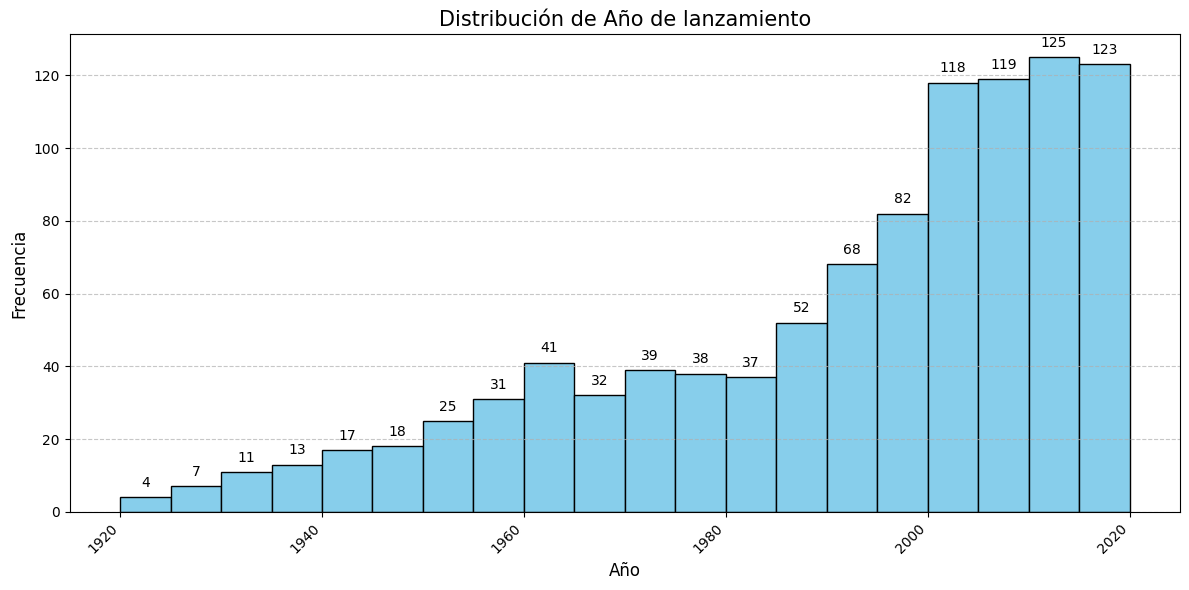

In [855]:

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Histograma
counts, bins, patches = plt.hist(df['Año de lanzamiento'], bins=20, color='skyblue', edgecolor='black')

# Títulos y etiquetas
plt.title('Distribución de Año de lanzamiento', fontsize=15)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Rotar las etiquetas del eje x
plt.xticks(rotation=45, ha='right')

# Rejilla
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el número de datos en cada barra
for count, patch in zip(counts, patches):
    plt.text(patch.get_x() + patch.get_width() / 2, count + 2, int(count), ha='center', va='bottom')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

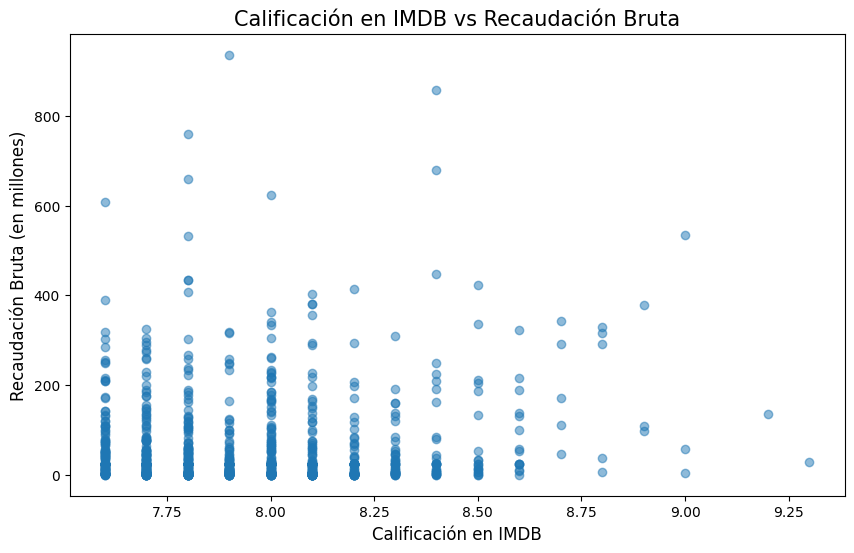

In [856]:

# Dividir la recaudación bruta por un millón para representar en millones
df['Recaudacion bruta en millones'] = df['Recaudacion bruta'] / 1e6

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Diagrama de dispersión entre calificación en IMDB y recaudación bruta en millones
plt.scatter(df['Calificacion en IMDB'], df['Recaudacion bruta en millones'], alpha=0.5)
plt.title('Calificación en IMDB vs Recaudación Bruta', fontsize=15)
plt.xlabel('Calificación en IMDB', fontsize=12)
plt.ylabel('Recaudación Bruta (en millones)', fontsize=12)

# Mostrar el gráfico
plt.show()

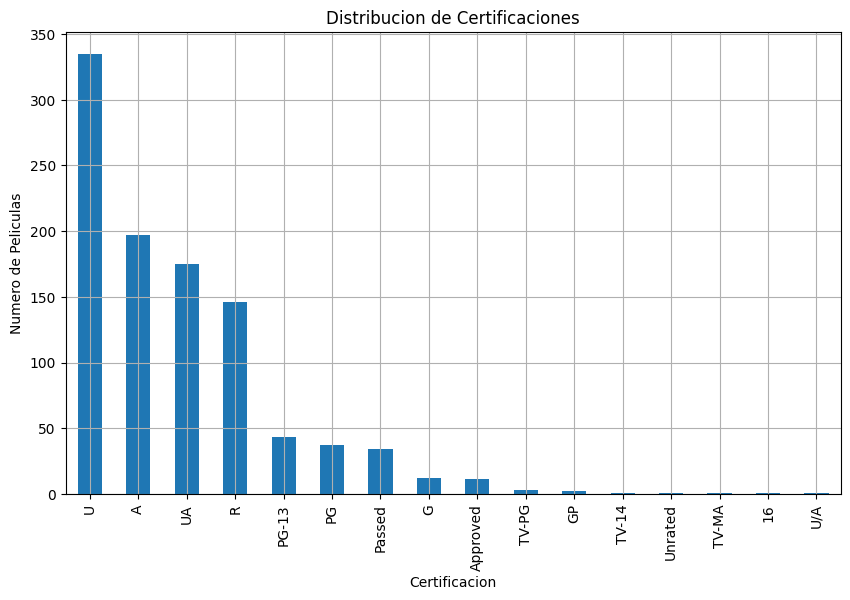

In [857]:
plt.figure(figsize=(10, 6))
df['Certificacion'].value_counts().plot(kind='bar')
plt.title('Distribucion de Certificaciones')
plt.xlabel('Certificacion')
plt.ylabel('Numero de Peliculas')
plt.grid(True)
plt.show()


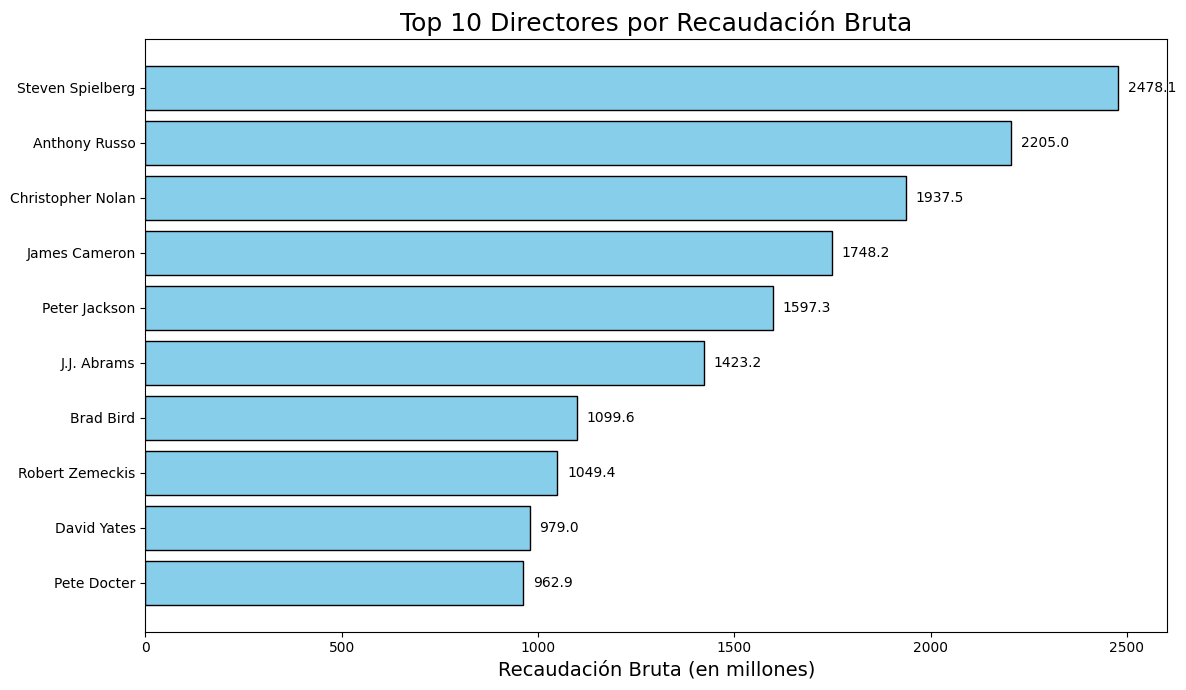

In [858]:
# Agrupar por director y sumar la recaudación bruta
directores_recaudacion = df.groupby('Director')['Recaudacion bruta'].sum().reset_index()

# Ordenar los directores por recaudación bruta en orden descendente
top10_directores = directores_recaudacion.sort_values(by='Recaudacion bruta', ascending=False).head(10)

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear un gráfico de barras para el top 10 de directores
bars = plt.barh(top10_directores['Director'], top10_directores['Recaudacion bruta'] / 1e6, color='skyblue', edgecolor='black')
plt.xlabel('Recaudación Bruta (en millones)', fontsize=14)
plt.title('Top 10 Directores por Recaudación Bruta', fontsize=18)
plt.gca().invert_yaxis()  # Invertir el eje y para que el director con mayor recaudación aparezca arriba

# Añadir etiquetas con los valores de recaudación bruta en millones
for bar in bars:
    width = bar.get_width()
    label_x_pos = width + (max(top10_directores['Recaudacion bruta'] / 1e6) * 0.01)  # Colocar la etiqueta un poco después del final de la barra
    plt.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{width:.1f}', va='center')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Actor
Daisy Ridley          9.366622e+08
John Boyega           9.366622e+08
Michelle Rodriguez    7.605076e+08
Billy Zane            6.593254e+08
Sarah Vowell          6.085817e+08
Huck Milner           6.085817e+08
Joe Russo             5.512599e+08
Aaron Eckhart         5.348584e+08
Diego Luna            5.321773e+08
Oscar Isaac           4.810526e+08
Name: Recaudacion bruta, dtype: float64


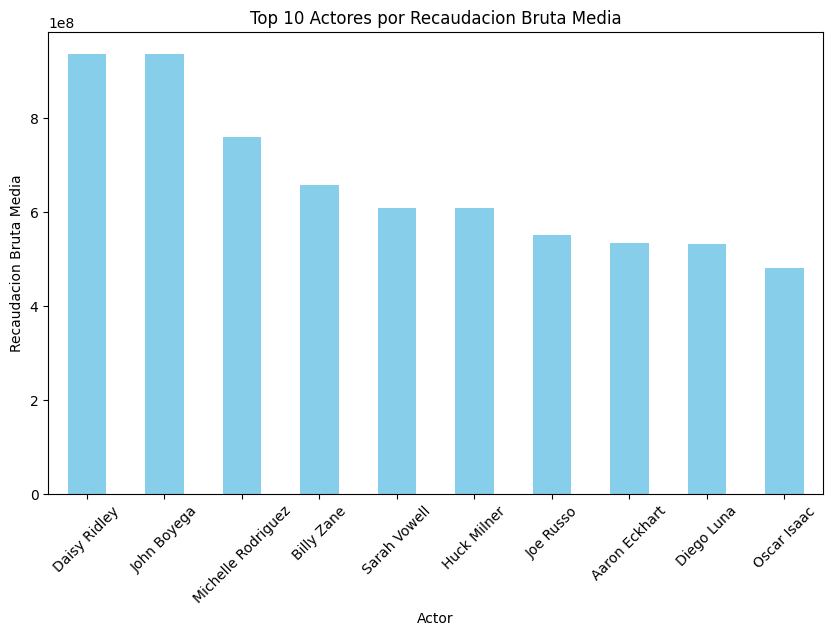

In [859]:
# Crear un nuevo DataFrame que contenga actores y sus recaudaciones brutas
actores_columnas = ['Actor Principal 1', 'Actor Principal 2', 'Actor Principal 3', 'Actor Principal 4']
actores_df = df.melt(id_vars=['Recaudacion bruta'], value_vars=actores_columnas, var_name='Rol', value_name='Actor')

# Agrupar por actor y calcular la recaudación bruta media
actor_recaudacion = actores_df.groupby('Actor')['Recaudacion bruta'].mean().sort_values(ascending=False)

# Mostrar los 10 actores con mayores ingresos medios en taquilla
top_actores = actor_recaudacion.head(10)
print(top_actores)

# Graficar los resultados
plt.figure(figsize=(10, 6))
top_actores.plot(kind='bar', color='skyblue')
plt.title('Top 10 Actores por Recaudacion Bruta Media')
plt.xlabel('Actor')
plt.ylabel('Recaudacion Bruta Media')
plt.xticks(rotation=45)
plt.show()
